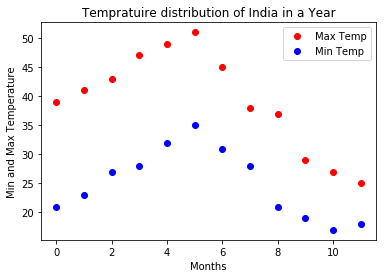

In [25]:
#Scipy:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset given below.

#Task:
#1. fitting it to the periodic function
#2. plot the fit

#Data
#Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

#Import required Libraray
import numpy as np
import pandas as pd
from scipy import linalg as linAlg
from scipy import optimize as opt
import matplotlib.pyplot as plt

#Arrays of Months, Minimum and Maximum Temperature.
maxTemp=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
minTemp=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months =np.arange(12)

#sample plot

plt.plot(months,maxTemp,'ro',label='Max Temp')
plt.plot(months,minTemp,'bo',label='Min Temp')
plt.title("Tempratuire distribution of India in a Year")
plt.xlabel('Months')
plt.ylabel('Min and Max Temperature')
plt.legend()
plt.show()

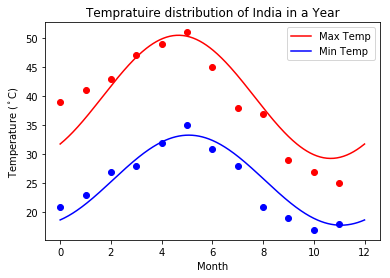

In [26]:
#Fitting it to the periodic function and call Optmize's Curve_Fit Functions

def yearlyTemperature(time, avg, ampl, offset):
    return (avg + ampl * np.cos((time + offset) * 2 * np.pi / time.max()))

maxResult, maxCover = opt.curve_fit(yearlyTemperature, months, maxTemp, [30, 50, 0])
minResult, minCover = opt.curve_fit(yearlyTemperature, months, minTemp, [10, 20, 0])
days = np.linspace(0, 12, num=365)

# data plot
plt.plot(months, maxTemp, 'ro')
plt.plot(days, yearlyTemperature(days, *maxResult),'r-', label='Max Temp')
plt.plot(months, minTemp, 'bo')
plt.plot(days, yearlyTemperature(days, *minResult),'b-', label='Min Temp')
plt.title("Tempratuire distribution of India in a Year")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

In [27]:
#Matplotlib:
#This assignment is for visualization using matplotlib:
#data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#titanic = pd.read_csv(url)
#Charts to plot:
#1. Create a pie chart presenting the male/female proportion
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

import pandas as pd
import matplotlib.pyplot as plt

#Read Data
titanicData = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanicData.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Male Count:  843
Female Count:  466


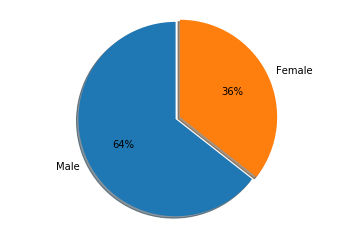

In [28]:
#1. Create a pie chart presenting the male/female proportion

#male and female count
maleCount=titanicData.loc[(titanicData.sex=='male')].sex.count()
femaleCount=titanicData.loc[(titanicData.sex=='female')].sex.count()

#print male and female count
print('Male Count: ',maleCount)
print('Female Count: ',femaleCount)

# Pie chart
labels = ['Male', 'Female']
sizes = [maleCount, femaleCount]
explode = (0.05,0)

#pie chart presenting the male/female proportion
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels,explode=explode, autopct='%1.0f%%',shadow=True, startangle=90)
ax1.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

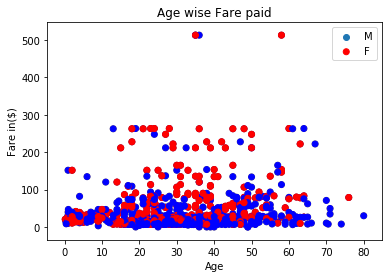

In [24]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

# Delete Null Rows
titanicNotNullData = titanicData.dropna(subset=['sex'])

#Declare and asssign age, Fare and Sex
x=titanicNotNullData.age
y=titanicNotNullData.fare
z=pd.factorize(titanicNotNullData['sex'])[0]

#a scatterplot with the Fare paid and the Age, differ the plot color by gender
plt.scatter(x,y,c=z)

#Declare and asssign age, Fare and Sex
Age=titanicNotNullData.age
Fare=titanicNotNullData.fare
mapping = {'male' : 'blue', 'female' : 'red'}
Sex=titanicNotNullData['sex'].map(mapping)

#a scatterplot with the Fare paid and the Age, differ the plot color by gender
plt.title('Age wise Fare paid')
plt.xlabel('Age')
plt.ylabel('Fare in($)')
plt.scatter(Age,Fare,c=Sex)
plt.legend('MF')
plt.show()